In [1]:
from pydataxm import *                           #Se realiza la importación de las librerias necesarias para ejecutar                        
from pydataxm.pydataxm import ReadDB as apiXM 
import datetime as dt                            
import pandas as pd
from pathlib import Path
import os

In [6]:
s_path=Path.cwd()
#s_prt_path=s_path.parent

sRutaPrint=s_path.joinpath('Print')
sRutaPrint

WindowsPath('c:/Alejo/Eje de Planeación/Análisis Eléctrico/ScriptsPython/Print')

In [7]:
objetoAPI = pydataxm.ReadDB()                    #Se almacena el servicio en el nombre objetoAPI

In [8]:
df =objetoAPI.get_collections()   

### Descargar las colecciones disponibles en la API

In [9]:
df.to_csv('Collections.csv')
df.head(5)

,MetricId,MetricName,Entity,MaxDays,Type,Url,Filter,MetricUnits,MetricDescription
0,DemaReal,Demanda Real por Sistema,Sistema,31,HourlyEntities,http://servapibi.xm.com.co/hourly,No aplica,kWh,Demanda de usuarios regulados y no regulados q...
1,DemaReal,Demanda Real por Agente,Agente,31,HourlyEntities,http://servapibi.xm.com.co/hourly,Codigo Comercializador,kWh,Demanda de usuarios regulados y no regulados q...
2,ExpoMoneda,Exportaciones Moneda por Sistema,Sistema,31,HourlyEntities,http://servapibi.xm.com.co/hourly,No aplica,COP,Transferencias de Energia desde Colombia hacia...
3,DemaCome,Demanda Comercial por Sistema,Sistema,31,HourlyEntities,http://servapibi.xm.com.co/hourly,No aplica,kWh,Considera la demanda propia de cada comerciali...
4,Gene,Generación por Sistema,Sistema,31,HourlyEntities,http://servapibi.xm.com.co/hourly,No aplica,kWh,Generacion neta de cada una de las plantas Nac...


In [12]:
FechaIni=dt.date(2024, 7, 1)
FechaFin=dt.date(2024, 8, 18)

#### Descarga de generación real

In [13]:

df_GenReal= apiXM.request_data(pydataxm.ReadDB(),    #Se indica el objeto que contiene el serivicio
                        "Gene",                #Se indica el nombre de la métrica tal como se llama en el campo metricID
                        "Recurso",                 #Campo que indica si es Sistema, Agente, Recurso, Comercializador
                        FechaIni,       #Corresponde a la fecha inicial de la consulta
                        FechaFin)      #Corresponde a la fecha final de la consulta

In [14]:
df_GenReal.head(5)

,Id,Values_code,Values_Hour01,Values_Hour02,Values_Hour03,Values_Hour04,Values_Hour05,Values_Hour06,Values_Hour07,Values_Hour08,...,Values_Hour16,Values_Hour17,Values_Hour18,Values_Hour19,Values_Hour20,Values_Hour21,Values_Hour22,Values_Hour23,Values_Hour24,Date
0,Recurso,2QBW,19746.42,19750.11,19776.67,19772.16,19768.28,19764.16,19771.05,19770.11,...,19737.03,19737.71,19747.49,19744.35,19741.13,19738.36,19740.65,19742.13,19742.07,2024-07-01
1,Recurso,2QRL,649.23,648.87,649.08,648.93,648.84,648.69,648.57,648.57,...,647.49,647.28,647.16,646.89,646.86,646.68,646.62,646.35,646.47,2024-07-01
2,Recurso,2QV2,NaN,NaN,16160.27,18853.20,18806.40,18810.00,18806.40,18788.40,...,16023.60,16030.80,16034.40,16030.80,18090.00,18450.00,18442.80,18439.20,15710.40,2024-07-01
3,Recurso,2R22,14644.71,14644.27,14643.92,14642.98,14644.15,14643.85,14648.95,14647.23,...,14646.85,14648.59,14645.60,14643.46,14642.25,14642.64,14641.63,14640.41,14641.96,2024-07-01
4,Recurso,2S6Q,NaN,NaN,NaN,4.80,210.00,147.00,87.00,85.20,...,NaN,NaN,NaN,93.00,25.80,NaN,NaN,NaN,NaN,2024-07-01


In [15]:
df_GenReal.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13470 entries, 0 to 5168
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Id             13470 non-null  object        
 1   Values_code    13470 non-null  object        
 2   Values_Hour01  8288 non-null   float64       
 3   Values_Hour02  8189 non-null   float64       
 4   Values_Hour03  8153 non-null   float64       
 5   Values_Hour04  8150 non-null   float64       
 6   Values_Hour05  8151 non-null   float64       
 7   Values_Hour06  8834 non-null   float64       
 8   Values_Hour07  11575 non-null  float64       
 9   Values_Hour08  12024 non-null  float64       
 10  Values_Hour09  12265 non-null  float64       
 11  Values_Hour10  12437 non-null  float64       
 12  Values_Hour11  12506 non-null  float64       
 13  Values_Hour12  12532 non-null  float64       
 14  Values_Hour13  12517 non-null  float64       
 15  Values_Hour14  12512 non-

In [16]:
df_GenReal.fillna(0, inplace=True)
df_GenReal.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13470 entries, 0 to 5168
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Id             13470 non-null  object        
 1   Values_code    13470 non-null  object        
 2   Values_Hour01  13470 non-null  float64       
 3   Values_Hour02  13470 non-null  float64       
 4   Values_Hour03  13470 non-null  float64       
 5   Values_Hour04  13470 non-null  float64       
 6   Values_Hour05  13470 non-null  float64       
 7   Values_Hour06  13470 non-null  float64       
 8   Values_Hour07  13470 non-null  float64       
 9   Values_Hour08  13470 non-null  float64       
 10  Values_Hour09  13470 non-null  float64       
 11  Values_Hour10  13470 non-null  float64       
 12  Values_Hour11  13470 non-null  float64       
 13  Values_Hour12  13470 non-null  float64       
 14  Values_Hour13  13470 non-null  float64       
 15  Values_Hour14  13470 non-

In [17]:
df_Rec= apiXM.request_data(pydataxm.ReadDB(),    #Se indica el objeto que contiene el serivicio
                        "ListadoRecursos",                #Se indica el nombre de la métrica tal como se llama en el campo metricID
                        "Sistema",                 #Campo que indica si es Sistema, Agente, Recurso, Comercializador
                        FechaIni,       #Corresponde a la fecha inicial de la consulta
                        FechaFin)      #Corresponde a la fecha final de la consulta

In [18]:
df_Rec.to_csv('RecursosSinergox.csv')

In [19]:
df_Rec.drop(['Date','Id'],axis=1,inplace=True)
df_Rec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 761 entries, 0 to 760
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Values_Code           761 non-null    object
 1   Values_Name           761 non-null    object
 2   Values_Type           761 non-null    object
 3   Values_Disp           761 non-null    object
 4   Values_RecType        761 non-null    object
 5   Values_CompanyCode    761 non-null    object
 6   Values_EnerSource     761 non-null    object
 7   Values_OperStartdate  761 non-null    object
 8   Values_State          761 non-null    object
dtypes: object(9)
memory usage: 53.6+ KB


In [20]:
df_Rec.head(10)

,Values_Code,Values_Name,Values_Type,Values_Disp,Values_RecType,Values_CompanyCode,Values_EnerSource,Values_OperStartdate,Values_State
0,2QBW,EL POPAL,HIDRAULICA,NO DESPACHADO CENTRALMENTE,NORMAL,ISGG,AGUA,2014-03-31,OPERACION
1,2QEK,SALTO II,HIDRAULICA,DESPACHADO CENTRALMENTE,FILO DE AGUA,ENDG,AGUA,2014-06-25,OPERACION
2,2QRL,LA REBUSCA,HIDRAULICA,NO DESPACHADO CENTRALMENTE,GEN. DISTRIBUIDA,HZEG,AGUA,2014-07-24,OPERACION
3,2QV2,BAJO TULUA,HIDRAULICA,NO DESPACHADO CENTRALMENTE,NORMAL,EPSG,AGUA,2015-01-30,OPERACION
4,2R22,LAGUNETA,HIDRAULICA,NO DESPACHADO CENTRALMENTE,NORMAL,ENDG,AGUA,2014-12-17,OPERACION
5,2S6Q,AUTOG YAGUARITO,TERMICA,NO DESPACHADO CENTRALMENTE,AUTOGENERADOR,EMSG,BIOGAS,2016-03-22,OPERACION
6,2S6S,AUTOG ARGOS YUMBO,TERMICA,NO DESPACHADO CENTRALMENTE,AUTOGENERADOR,EPSG,CARBON,2016-03-20,OPERACION
7,2S6U,AUTOG ARGOS EL CAIRO,HIDRAULICA,NO DESPACHADO CENTRALMENTE,AUTOGENERADOR,EPMG,AGUA,2017-09-29,OPERACION
8,2S78,LA FRISOLERA,HIDRAULICA,NO DESPACHADO CENTRALMENTE,GEN. DISTRIBUIDA,GPYG,AGUA,2016-04-29,OPERACION
9,2S8G,AUTOG ARGOS TOLUVIEJO,TERMICA,NO DESPACHADO CENTRALMENTE,AUTOGENERADOR,EPSG,CARBON,2016-03-03,PRUEBAS


In [21]:
df_Gen_Type=df_GenReal.merge(df_Rec,left_on=['Values_code'],right_on=['Values_Code'], how='left')

In [22]:
df_Gen_Type.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13470 entries, 0 to 13469
Data columns (total 36 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Id                    13470 non-null  object        
 1   Values_code           13470 non-null  object        
 2   Values_Hour01         13470 non-null  float64       
 3   Values_Hour02         13470 non-null  float64       
 4   Values_Hour03         13470 non-null  float64       
 5   Values_Hour04         13470 non-null  float64       
 6   Values_Hour05         13470 non-null  float64       
 7   Values_Hour06         13470 non-null  float64       
 8   Values_Hour07         13470 non-null  float64       
 9   Values_Hour08         13470 non-null  float64       
 10  Values_Hour09         13470 non-null  float64       
 11  Values_Hour10         13470 non-null  float64       
 12  Values_Hour11         13470 non-null  float64       
 13  Values_Hour12   

In [23]:
columns_name=list(df_Gen_Type.columns)[2:26]
icont=1
for iname in columns_name:
    df_Gen_Type.rename(columns={iname:icont},inplace=True)
    icont+=1

In [24]:
# Unit kWh
df_Aportes= apiXM.request_data(pydataxm.ReadDB(),    #Se indica el objeto que contiene el serivicio
                        "AporEner",                #Se indica el nombre de la métrica tal como se llama en el campo metricID
                        "Sistema",                 #Campo que indica si es Sistema, Agente, Recurso, Comercializador
                        FechaIni,       #Corresponde a la fecha inicial de la consulta
                        FechaFin)      #Corresponde a la fecha final de la consulta
df_Aportes.rename(columns={'Value':'Aportes'},inplace=True)
df_Aportes.head(5)   

,Id,Aportes,Date
0,Sistema,279201400.0,2024-07-01
1,Sistema,291625700.0,2024-07-02
2,Sistema,336697600.0,2024-07-03
3,Sistema,340458600.0,2024-07-04
4,Sistema,455697600.0,2024-07-05


#### Imprimir resultados

In [25]:
with pd.ExcelWriter('GenReal.xlsx',engine='xlsxwriter') as writer:
    df_Gen_Type.to_excel(writer, sheet_name='Gen', index=False)
    df_Aportes.to_excel(writer, sheet_name='Aportes', index=False)

# Realizar pronóstico

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

In [27]:
df_data=pd.read_excel('GenReal.xlsx', sheet_name='Data')
df_data.head(5)

ValueError: Worksheet named 'Data' not found

In [ ]:
# Convertir los datos a un arreglo numpy
dataset = df_data['GenReal'].values.astype(float)

# Normalizar los datos
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset.reshape(-1, 1))



Epoch 1/100

60/60 - 2s - loss: 0.1577 - 2s/epoch - 25ms/step
Epoch 2/100
60/60 - 0s - loss: 0.0284 - 83ms/epoch - 1ms/step
Epoch 3/100
60/60 - 0s - loss: 0.0249 - 75ms/epoch - 1ms/step
Epoch 4/100
60/60 - 0s - loss: 0.0236 - 75ms/epoch - 1ms/step
Epoch 5/100
60/60 - 0s - loss: 0.0225 - 101ms/epoch - 2ms/step
Epoch 6/100
60/60 - 0s - loss: 0.0231 - 76ms/epoch - 1ms/step
Epoch 7/100
60/60 - 0s - loss: 0.0207 - 61ms/epoch - 1ms/step
Epoch 8/100
60/60 - 0s - loss: 0.0203 - 62ms/epoch - 1ms/step
Epoch 9/100
60/60 - 0s - loss: 0.0197 - 59ms/epoch - 983us/step
Epoch 10/100
60/60 - 0s - loss: 0.0186 - 66ms/epoch - 1ms/step
Epoch 11/100
60/60 - 0s - loss: 0.0176 - 68ms/epoch - 1ms/step
Epoch 12/100
60/60 - 0s - loss: 0.0176 - 65ms/epoch - 1ms/step
Epoch 13/100
60/60 - 0s - loss: 0.0167 - 60ms/epoch - 1ms/step
Epoch 14/100
60/60 - 0s - loss: 0.0180 - 61ms/epoch - 1ms/step
Epoch 15/100
60/60 - 0s - loss: 0.0165 - 56ms/epoch - 929us/step
Epoch 16/100
60/60 - 0s - loss: 0.0158 - 67ms/epoch - 1ms

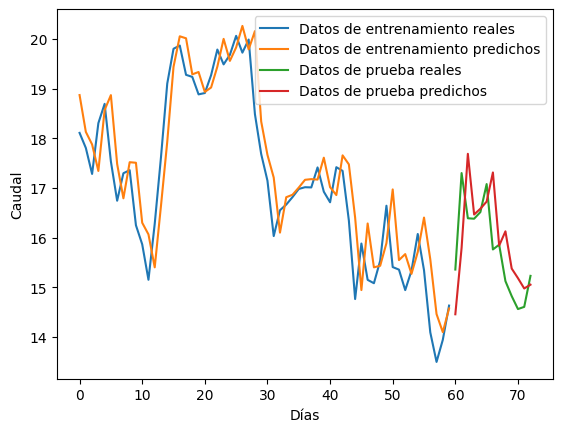

In [ ]:
# Función para preparar los datos para el modelo LSTM
def create_dataset(dataset, time_steps):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_steps-1):
        a = dataset[i:(i+time_steps), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_steps, 0])
    return np.array(dataX), np.array(dataY)

# Fijar la semilla aleatoria para reproducibilidad
np.random.seed(7)

# Número de pasos temporales
time_steps = 3

# Dividir los datos en conjuntos de entrenamiento y prueba
train_size = int(len(dataset) * 0.8)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size], dataset[train_size:len(dataset)]

# Preparar los datos para el modelo LSTM
trainX, trainY = create_dataset(train, time_steps)
testX, testY = create_dataset(test, time_steps)

# Reshape de los datos para que coincidan con el formato de entrada de LSTM [muestras, pasos de tiempo, características]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# Construir el modelo LSTM
model = Sequential()
model.add(LSTM(50, input_shape=(1, time_steps)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Entrenar el modelo
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

# Realizar predicciones
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# Invertir la normalización para obtener los valores reales
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# Visualizar resultados
plt.plot(trainY[0], label='Datos de entrenamiento reales')
plt.plot(trainPredict[:,0], label='Datos de entrenamiento predichos')
plt.plot([None for i in trainY[0]] + [x for x in testY[0]], label='Datos de prueba reales')
plt.plot([None for i in trainY[0]] + [x for x in testPredict[:,0]], label='Datos de prueba predichos')
plt.xlabel('Días')
plt.ylabel('Caudal')
plt.legend()
plt.show()

### Modelo Arima

In [ ]:
# Instalar la biblioteca si aún no está instalada
# pip install pandas numpy statsmodels matplotlib

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
df_data=pd.read_excel('GenReal.xlsx', sheet_name='Data')
df_data.head(5)

,Date,GenReal,Aportes
0,2023-12-01,18.321340,108.5395
1,2023-12-02,18.394800,103.7838
2,2023-12-03,18.712330,99.2160
3,2023-12-04,18.111688,94.4057
4,2023-12-05,17.808328,92.8676


In [ ]:
# Convertir la columna de fecha a formato datetime si no está en ese formato
df_data['Date'] = pd.to_datetime(df_data['Date'])

In [ ]:
# Establecer la columna de fecha como índice
df_data.set_index('Date', inplace=True)

In [ ]:
df_data.drop('Aportes',axis=1, inplace=True)

In [ ]:
# Entrenar el modelo ARIMA
modelo_arima = ARIMA(df_data, order=(5,1,0))  # Parámetros (p,d,q) para el modelo ARIMA
ajuste = modelo_arima.fit()

c:\Users\eramirez\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\eramirez\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\eramirez\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


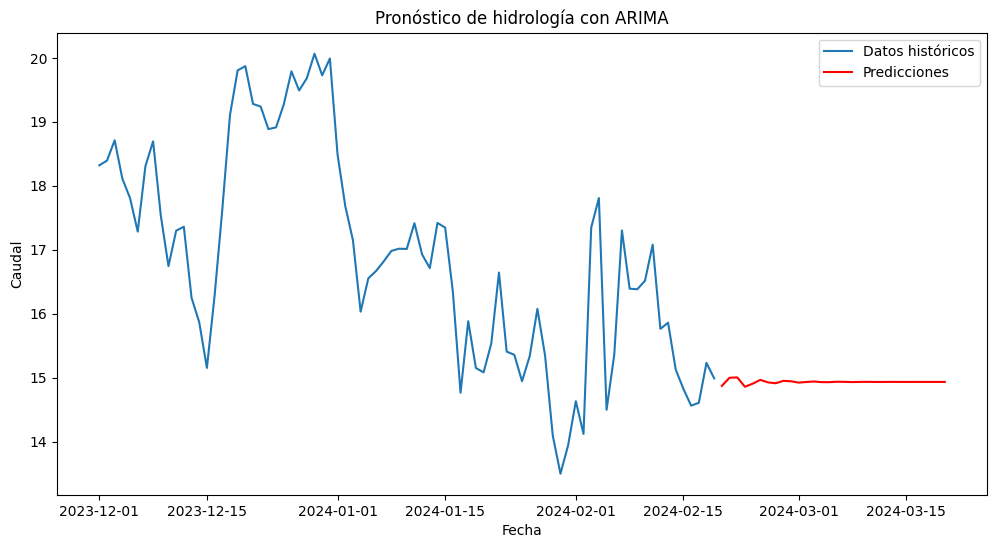

In [ ]:
# Realizar predicciones para los próximos 30 períodos
predicciones = ajuste.forecast(steps=30)

# Crear índice de fechas para las predicciones
fechas_prediccion = pd.date_range(start=df_data.index[-1], periods=31, freq='D')[1:]  # La primera fecha es el último día de los datos históricos, excluyéndola

# Visualizar resultados
plt.figure(figsize=(12, 6))
plt.plot(df_data.index, df_data, label='Datos históricos')
plt.plot(fechas_prediccion, predicciones, color='red', label='Predicciones')
plt.title('Pronóstico de hidrología con ARIMA')
plt.xlabel('Fecha')
plt.ylabel('Caudal')
plt.legend()
plt.show()

### Modelo SARIMA

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Cargar los datos históricos de hidrología (por ejemplo, caudales)
# Asegúrate de tener un archivo CSV con dos columnas: 'ds' para la fecha y 'y' para el valor de la variable hidrológica
data=pd.read_excel('GenReal.xlsx', sheet_name='Data')

# Convertir la columna de fecha a formato datetime si no está en ese formato
data['Date'] = pd.to_datetime(data['Date'])

# Establecer la columna de fecha como índice
data.set_index('Date', inplace=True)
data.drop('Aportes',axis=1, inplace=True)
data.head(5)

,GenReal
Date,
2023-12-01,18.321340
2023-12-02,18.394800
2023-12-03,18.712330
2023-12-04,18.111688
2023-12-05,17.808328


c:\Users\eramirez\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\eramirez\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\eramirez\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
c:\Users\eramirez\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting se

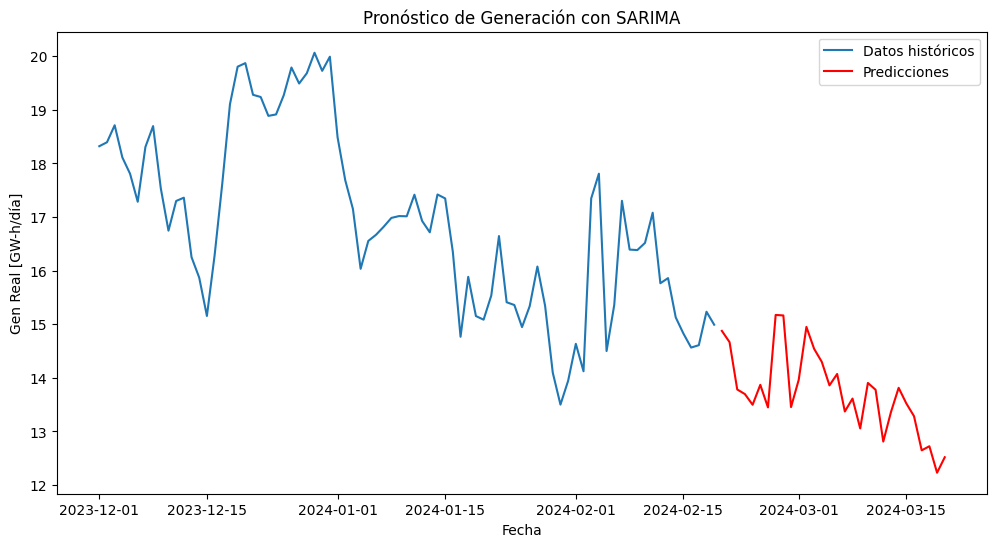

In [ ]:
# Entrenar el modelo SARIMA
modelo_sarima = SARIMAX(data, order=(2, 2, 2), seasonal_order=(1, 1, 1, 12))  # Especifica los órdenes de los términos ARIMA y estacionales
ajuste = modelo_sarima.fit()

# Realizar predicciones para los próximos 30 períodos
predicciones = ajuste.forecast(steps=30)

# Crear índice de fechas para las predicciones
fechas_prediccion = pd.date_range(start=data.index[-1], periods=31, freq='D')[1:]  # La primera fecha es el último día de los datos históricos, excluyéndola

# Visualizar resultados
plt.figure(figsize=(12, 6))
plt.plot(data.index, data, label='Datos históricos')
plt.plot(fechas_prediccion, predicciones, color='red', label='Predicciones')
plt.title('Pronóstico de Generación con SARIMA')
plt.xlabel('Fecha')
plt.ylabel('Gen Real [GW-h/día]')
plt.legend()
plt.show()

In [ ]:
df_result=pd.DataFrame(predicciones)

df_result.to_csv('Results.csv')

### SARIMA para la variable real de la generación con agua

C:\Users\eramirez\AppData\Local\Temp\ipykernel_2448\4262107638.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
c:\Users\eramirez\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\eramirez\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


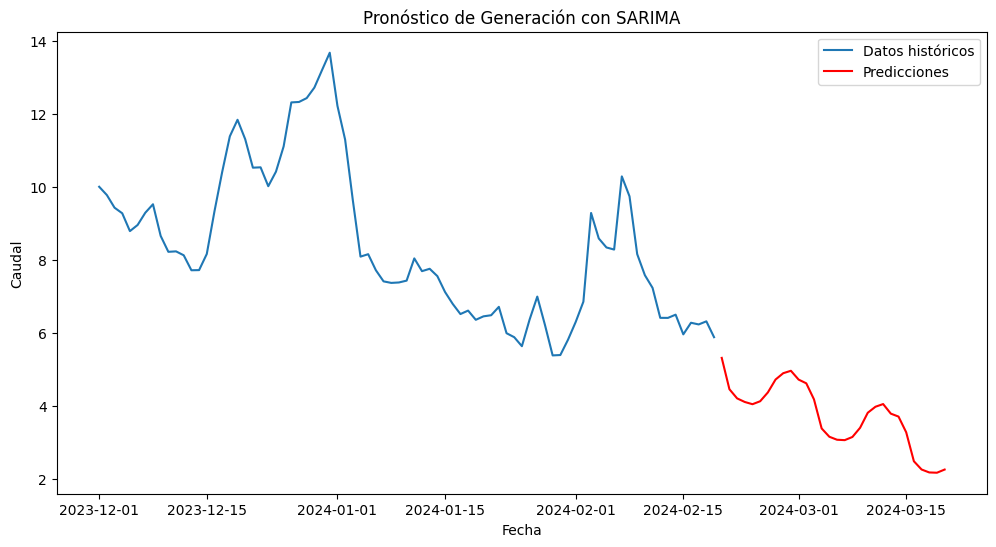

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Cargar los datos históricos de hidrología (por ejemplo, caudales)
# Asegúrate de tener un archivo CSV con dos columnas: 'ds' para la fecha y 'y' para el valor de la variable hidrológica
data=pd.read_excel('GenReal.xlsx', sheet_name='Fecha_Comb')

# Convertir la columna de fecha a formato datetime si no está en ese formato
data['Date'] = pd.to_datetime(data['Date'])

# Establecer la columna de fecha como índice
data=data[['Date','AGUA']]
data.set_index('Date', inplace=True)
data.head(5)

# Entrenar el modelo SARIMA
modelo_sarima = SARIMAX(data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))  # Especifica los órdenes de los términos ARIMA y estacionales
ajuste = modelo_sarima.fit()

# Realizar predicciones para los próximos 30 períodos
predicciones = ajuste.forecast(steps=30)

# Crear índice de fechas para las predicciones
fechas_prediccion = pd.date_range(start=data.index[-1], periods=31, freq='D')[1:]  # La primera fecha es el último día de los datos históricos, excluyéndola

# Visualizar resultados
plt.figure(figsize=(12, 6))
plt.plot(data.index, data, label='Datos históricos')
plt.plot(fechas_prediccion, predicciones, color='red', label='Predicciones')
plt.title('Pronóstico de Generación con SARIMA')
plt.xlabel('Fecha')
plt.ylabel('Caudal')
plt.legend()
plt.show()

df_result2=pd.DataFrame(predicciones)

df_result2.to_csv('Results.csv')